# Tugas Besar IF3270 Pembelajaran Mesin
## Bagian A: Implementasi Forward Propagation untuk Feed Forward Neural Network

Anggota kelompok:

1. Christine Hutabarat (13520005)
2. Hana Fathiyah (13520047)
3. Yohana Golkaria Nainggolan (13520053)
4. Alifia Rahmah (13520122)



## 1. Perancangan struktur file eksternal untuk penyimpanan model

Struktur file:
```
<jumlah layer>
<jumlah neuron layer 1> <linear/relu/sigmoid/softmax>
<jumlah neuron layer 2> <linear/relu/sigmoid/softmax>
...
<jumlah neuron layer n> <linear/relu/sigmoid/softmax>
<initial weight layer 1>
```

Contoh:
```
3
1 linear
5 sigmoid
2 relu
15
```

```
2
2 linear
1 sigmoid
3 5
```

### Deklarasi kelas Neuron, Layer, dan Model (WIP_

In [3]:
class Neuron:
  # value: float
  # id: string (format: f<layer_id><neuron_id> (ex: f01, f11, f21, ...))
  # children: dict (key: neuron_id, value: weight)

  def __init__(self, value=0, id=''):
    self.value = value
    self.id = id
    self.children = dict()

  def update_value(self, new_value):
    self.value = new_value

  def __str__(self):
    return f'<{self.id} = {self.value}>\n'
  
  def update_children(self, neuron_id, weight):
    self.children.update({neuron_id: weight})


class Layer:
  # id: number (0, 1, 2, ...)
  # activation: linear | relu | sigmoid | softmax
  # neurons: Neuron[]
  
  def __init__(self, activation, id=0):
    self.activation = activation
    self.id = id
    self.neurons = []

  def __str__(self):
    s = f'''layer {self.id}
  activation: {self.activation.__name__}
  neuron count: {len(self.neurons)}
  neurons:\n'''
    for n in self.neurons:
      s += '    '
      s += str(n)
    return s

  def add_neuron(self):
    self.neurons.append(Neuron(id=f'f{self.id}{len(self.neurons)+1}'))


class Model:
  # layers: Layer[]

  def __init__(self):
    self.layers = []

  def __str__(self):
    s = ''
    for layer in self.layers:
      s += str(layer)
      s += '\n'
    return s

  def add_layer(self, activation, id):
    self.layers.append(Layer(activation, id))

  def add_neuron(self, layer_id):
    self.layers[layer_id].add_neuron()

    # update network
    if (layer_id > 0):
      prev_layer = self.layers[layer_id-1]
      for neuron in prev_layer.neurons:
        neuron.update_children(self.layers[layer_id].neurons[-1].id, 0)

  def forward_propagation(self):
    # TODO: add bias
    for i in range (1, len(self.layers)):
      for neuron in self.layers[i].neurons:
        net = 0
        prev_layer = self.layers[i-1]
        activation = self.layers[i].activation
        for prev_neuron in prev_layer.neurons:
          net += prev_neuron.value * prev_neuron.children[neuron.id]
        neuron.update_value(activation(net))
        


In [4]:
# Helper function
from math import exp

# net -> persamaan linear (ax+b+...)

def linear(net):
  return net

def relu(net):
  return max(0, net)

def sigmoid(net):
  return 1/(1 + exp(net * -1))

def softmax(net_i, arr_net):
  net_sum = 0
  for i in arr_net:
    net_sum += i
  return (exp(net_i))/net_sum

In [5]:
m = Model()
m.add_layer(linear, 0)
m.add_neuron(0)
m.add_layer(relu, 1)
m.add_neuron(0)
m.add_neuron(1)
m.add_neuron(1)
print(m)

layer 0
  activation: linear
  neuron count: 2
  neurons:
    <f01 = 0>
    <f02 = 0>

layer 1
  activation: relu
  neuron count: 2
  neurons:
    <f11 = 0>
    <f12 = 0>




## 2. Implementasi load dari file teks

In [6]:
file = open("sample.txt", 'w')
file.write('''3
1 linear
5 sigmoid
2 relu
15''')
file.close()

In [7]:
def load_file(filename):
  f = open(filename)
  layercount = int(f.readline().strip())
  layers = []
  initweight = []
  for line in f:
    layers.append(line.strip().split(' '))
  initweight = list(map(int,layers.pop()))
  for l in layers:
    l[0] = int(l[0])
  return layercount, layers, initweight

In [8]:
layercount, layers, initweight = load_file("sample.txt")
print(layercount)
print(layers)
print(initweight)

3
[[1, 'linear'], [5, 'sigmoid'], [2, 'relu']]
[15]


## 3. Implementasi forward propagation

In [9]:
# setting the value, weight, then forward propagation
m.layers[0].neurons[0].update_value(1)
m.layers[0].neurons[0].update_children(m.layers[1].neurons[0].id, 5)
m.forward_propagation()
print(m)

layer 0
  activation: linear
  neuron count: 2
  neurons:
    <f01 = 1>
    <f02 = 0>

layer 1
  activation: relu
  neuron count: 2
  neurons:
    <f11 = 5>
    <f12 = 0>




### a. Menampilkan struktur jaringan

In [10]:
def draw_compact_structure(layers):
  print(f'x({layers[0][0]})\t= {layers[0][1]}')
  print(' ↓ ')
  for i in range(1, len(layers)-1):
    print(f'h{i}({layers[i][0]})\t= {layers[i][1]}')
    print(' ↓ ')
  print(f'y({layers[i+1][0]})\t= {layers[i+1][1]}')

In [11]:
draw_compact_structure(layers)

x(1)	= linear
 ↓ 
h1(5)	= sigmoid
 ↓ 
y(2)	= relu


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_structure(layers):
  G = nx.Graph()

  # input
  for i in range(layers[0][0]+1): # neuron+bias
    G.add_node(f'x{i}', pos=(1, i+1)) # x1, x2, ...

  # hidden
  for i in range(1, len(layers)-1): # layer+bias
    for j in range(layers[i][0]+1): # neuron+bias
      G.add_node(f'h{i}{j}', pos=(i+1, j+1)) # hi0, hi1, .., hij
      for k in range(layers[i-1][0]+1):
        G.add_edge(f'x{k}', f'h{i}{j}')

  # output
  for i in range(layers[-1][0]): # neuron+bias
    for j in range(layers[-2][0]+1): # last hidden layer
      G.add_node(f'o{i+1}', pos=(len(layers), i+1))
      G.add_edge(f'h{len(layers)-2}{j}', f'o{i+1}')

  pos = nx.get_node_attributes(G, 'pos')
  fig, ax = plt.subplots()
  nx.draw_networkx_nodes(G, pos, ax=ax, node_size=1000)
  nx.draw_networkx_edges(G, pos, ax=ax)
  labels = {n: n for n in G.nodes()}
  nx.draw_networkx_labels(G, pos, labels, font_color='white', ax=ax)
  ax.set_xticks([])
  ax.set_yticks([])

  plt.show()

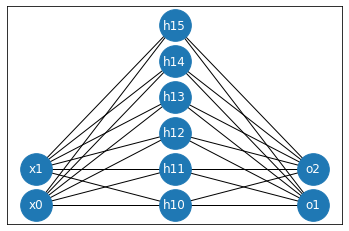

In [13]:
draw_structure(layers)

### b. Memprediksi output untuk input 1 instance

In [14]:
a = 5
sigmoid(5*a+1)

0.999999999994891

c. Memprediksi output untuk input batch sejumlah instances

## 4. Pengujian kebenaran fungsional